# **Projets ML PR**

# Nouvelle section

**L’objectif** de ce travail est de mettre en œuvre les acquis d’apprentissage initiés
dans le cours ML &amp; PR.
Le travail demandé est de réaliser un projet d’apprentissage automatique basé sur
le dataset de votre choix et une approche d’apprentissage de votre choix.
Le travail globalement devrait comporter les points suivants :
1. Description de l’objectif de l’apprentissage et de la problématique traitée.
2. Description du Datasets
3. Présentation de l’approche d’apprentissage adoptée et justification du choix
4. Evaluation des performances de l’apprentissage
5. Analyse des résultats
6. Conclusion

Importation des librairies

In [150]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import datetime as dt

Importation du dataset


In [151]:
my_filepath = '/content/corona_morocco - corona_morocco.csv'
my_data = pd.read_csv(my_filepath)

In [152]:
my_data['Date']=[dt.datetime.strptime(x,'%d/%m/%Y') for x in my_data['Date'] ]

Affichage des données

In [153]:
my_data.head()


,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,2020-03-20,86,0,0,374,2,16,0,0,13,1,0,7,1,16,6,4
1,2020-03-21,96,0,0,385,2,22,1,0,21,1,0,10,4,22,6,7
2,2020-03-22,109,4,3,498,3,26,1,0,24,1,0,13,5,29,6,7
3,2020-03-23,143,4,5,643,3,34,1,0,35,1,0,15,7,32,6,9
4,2020-03-24,170,5,6,685,4,42,1,0,36,1,0,22,7,40,6,11


In [154]:
my_data.dtypes


Date                         datetime64[ns]
Confirmed                             int64
Deaths                                int64
Recovered                             int64
Excluded                              int64
Beni Mellal-Khenifra                  int64
Casablanca-Settat                     int64
Draa-Tafilalet                        int64
Dakhla-Oued Ed-Dahab                  int64
Fes-Meknes                            int64
Guelmim-Oued Noun                     int64
Laayoune-Sakia El Hamra               int64
Marrakesh-Safi                        int64
Oriental                              int64
Rabat-Sale-Kenitra                    int64
Souss-Massa                           int64
Tanger-Tetouan-Al Hoceima             int64
dtype: object

In [155]:
actif_column= my_data['Confirmed'] - my_data['Recovered'] - my_data['Deaths']
total_test_perDay = my_data['Confirmed'] + my_data['Excluded']
my_data['Actif'] = actif_column
my_data['Total Test'] = total_test_perDay

In [156]:
my_data.head()

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
0,2020-03-20,86,0,0,374,2,16,0,0,13,1,0,7,1,16,6,4,86,460
1,2020-03-21,96,0,0,385,2,22,1,0,21,1,0,10,4,22,6,7,96,481
2,2020-03-22,109,4,3,498,3,26,1,0,24,1,0,13,5,29,6,7,102,607
3,2020-03-23,143,4,5,643,3,34,1,0,35,1,0,15,7,32,6,9,134,786
4,2020-03-24,170,5,6,685,4,42,1,0,36,1,0,22,7,40,6,11,159,855


Ajout des cas actifs et du total des tests par jour

Text(0, 0.5, 'Nombre des tests')

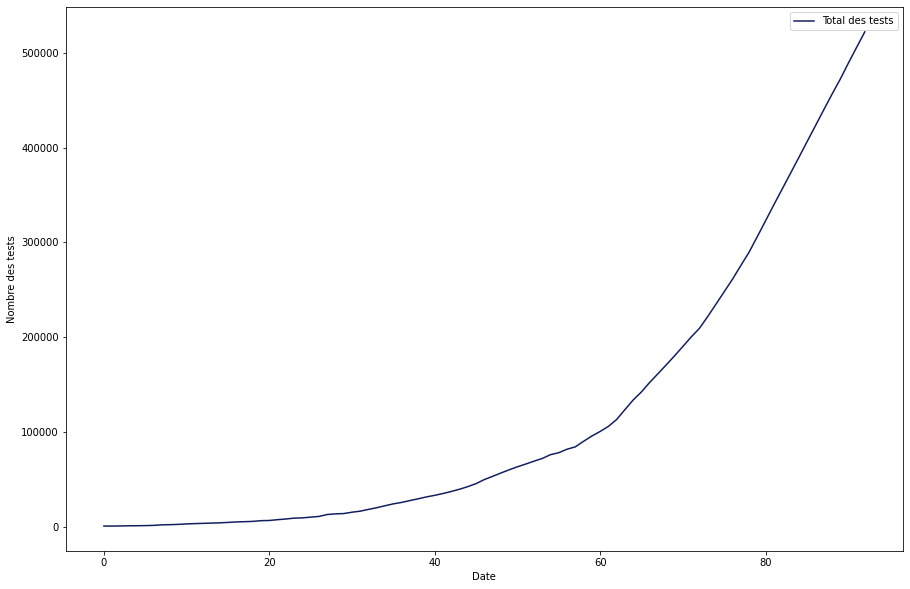

In [157]:
plt.figure(figsize=(15,10))
sns.lineplot(data = my_data['Total Test'],label='Total des tests', color="#111d5e")
plt.xlabel('Date')
plt.ylabel('Nombre des tests')


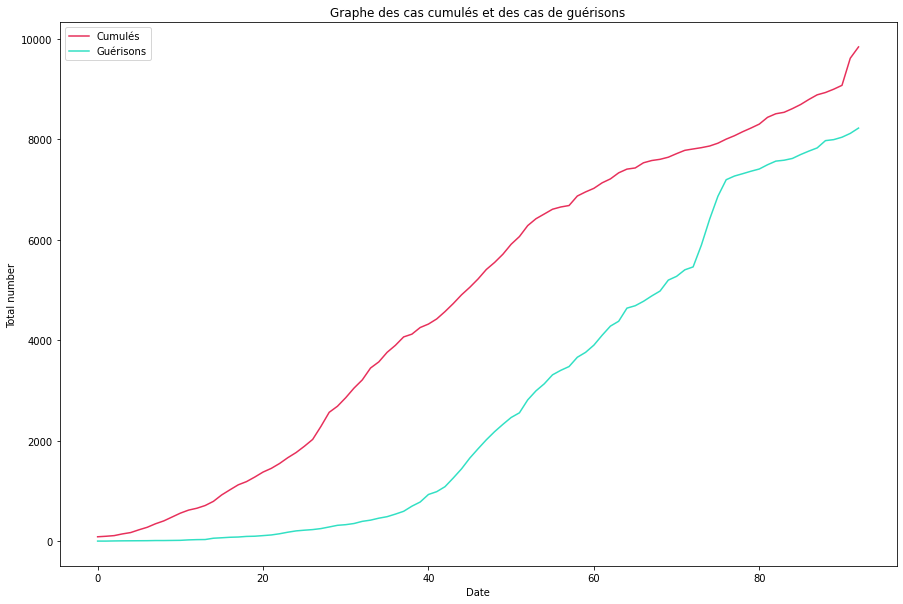

In [158]:
plt.figure(figsize=(15,10))
sns.lineplot(data = my_data['Confirmed'],label='Cumulés', color="#e7305b")
sns.lineplot(data = my_data['Recovered'],label='Guérisons', color="#32e0c4" )
plt.xlabel('Date')
plt.ylabel('Total number')
plt.title('Graphe des cas cumulés et des cas de guérisons')

plt.legend()

In [159]:
actif_column= my_data['Confirmed'] - my_data['Recovered'] - my_data['Deaths']
total_test_perDay = my_data['Confirmed'] + my_data['Excluded']
my_data['Actif'] = actif_column
my_data['Total Test'] = total_test_perDay

Text(0, 0.5, 'Cumulés')

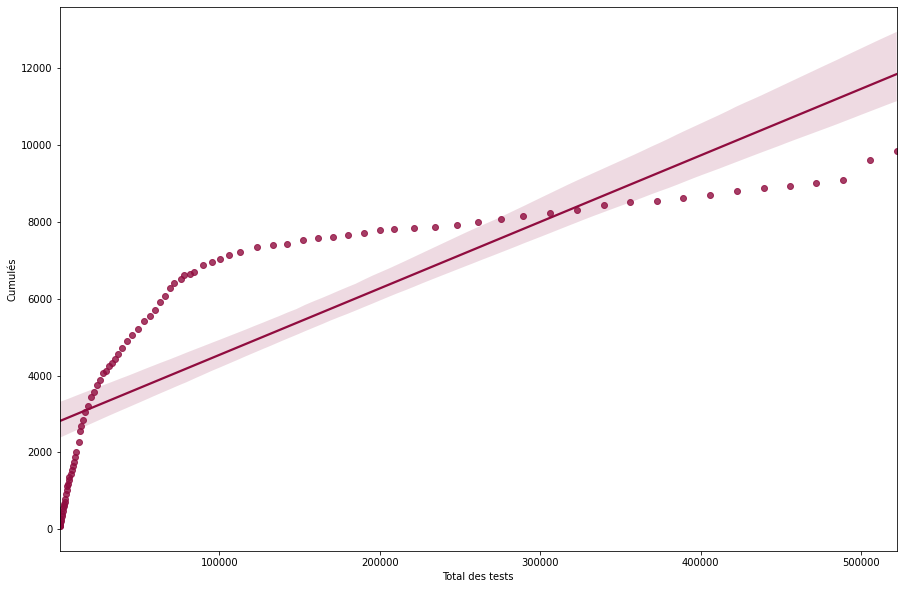

In [160]:
plt.figure(figsize=(15,10))
sns.regplot(x = my_data['Total Test'],y = my_data['Confirmed'], color="#900c3f")
plt.xlabel('Total des tests')
plt.ylabel('Cumulés')

In [161]:
my_data = my_data.set_index('Date')

my_data.head()


,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
Date,,,,,,,,,,,,,,,,,,
2020-03-20,86,0,0,374,2,16,0,0,13,1,0,7,1,16,6,4,86,460
2020-03-21,96,0,0,385,2,22,1,0,21,1,0,10,4,22,6,7,96,481
2020-03-22,109,4,3,498,3,26,1,0,24,1,0,13,5,29,6,7,102,607
2020-03-23,143,4,5,643,3,34,1,0,35,1,0,15,7,32,6,9,134,786
2020-03-24,170,5,6,685,4,42,1,0,36,1,0,22,7,40,6,11,159,855


Text(0.5, 1.0, 'Evolution des cas par régions')

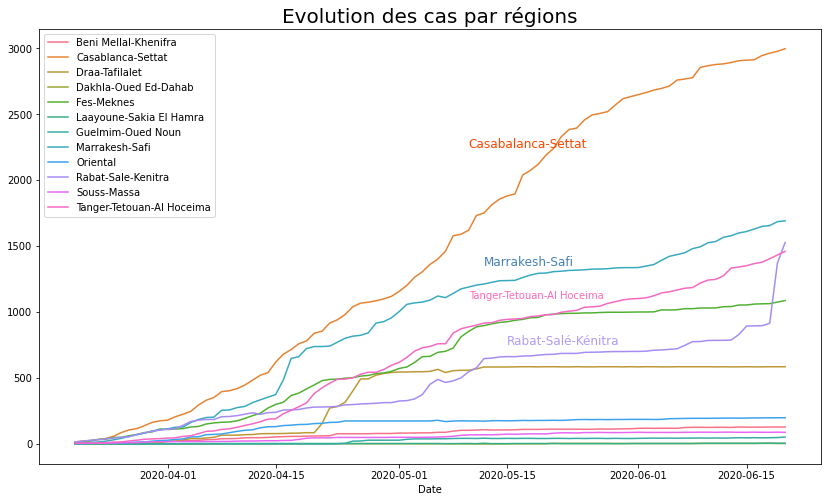

In [162]:
# Selecting regions
Regions1 = ['Beni Mellal-Khenifra',
       'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab',
       'Fes-Meknes', 'Laayoune-Sakia El Hamra','Guelmim-Oued Noun', 
       'Marrakesh-Safi', 'Oriental', 'Rabat-Sale-Kenitra', 'Souss-Massa','Tanger-Tetouan-Al Hoceima']


plt.figure(figsize=(14,8))
sns.lineplot(data = my_data[Regions1],dashes=False)

plt.text('2020-05-10', 2250, 'Casabalanca-Settat', fontsize=12,color='#ff4500')
plt.text('2020-05-12', 1350, 'Marrakesh-Safi', fontsize=12,color='#4682B4')
plt.text('2020-05-10', 1100, 'Tanger-Tetouan-Al Hoceima', fontsize=10,color='#FF69B4')
plt.text('2020-05-15', 750, 'Rabat-Salé-Kénitra', fontsize=12,color='#b09df3')

plt.title('Evolution des cas par régions',fontsize = 20)

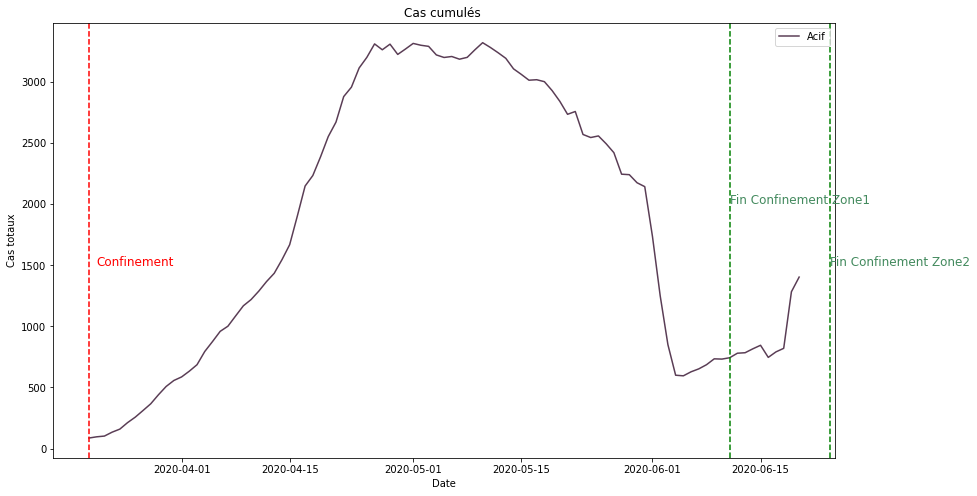

In [163]:
plt.figure(figsize=(14,8))
sns.lineplot(data = my_data['Actif'],label='Acif', color="#5a3d55")
plt.axvline('2020-03-20',ls = '--',c = 'r')
plt.axvline('2020-06-24',ls = '--',c = 'g')
plt.axvline('2020-06-11',ls = '--',c = 'g')
plt.text('2020-03-21', 1500, 'Confinement', fontsize=12,color='#FF0000')
plt.text('2020-06-24', 1500, 'Fin Confinement Zone2', fontsize=12,color='#438a5e')
plt.text('2020-06-11', 2000, 'Fin Confinement Zone1', fontsize=12,color='#438a5e')
plt.xlabel('Date')
plt.ylabel('Cas totaux')
plt.title('Cas cumulés ')
plt.legend()

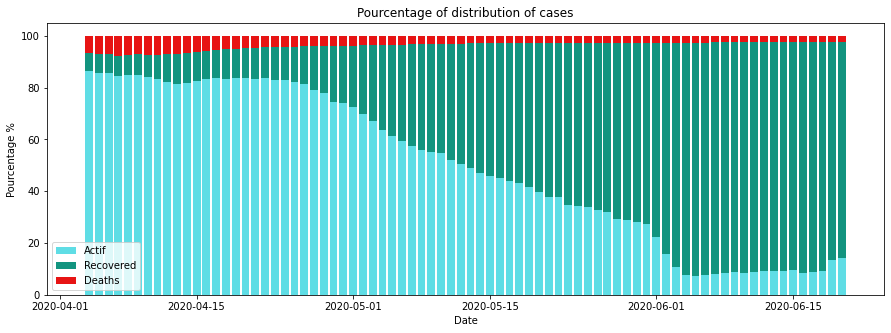

In [164]:
# getting the data that we want to plot
my_data_ori = my_data.copy()

plt.figure(figsize=(15,5))
dataVar1 =(my_data_ori['Actif']*100/my_data_ori['Confirmed'])[15:]
dataVar3 =(my_data_ori['Deaths']*100/my_data_ori['Confirmed'])[15:]
dataVar2 =(my_data_ori['Recovered']*100/my_data_ori['Confirmed'])[15:]


# plot each data
p1 = plt.bar(dataVar1.index, 
             dataVar1,label='Actif', color = '#5fdde5')

p2 = plt.bar(dataVar2.index, 
             dataVar2,
             bottom=dataVar1,label='Recovered', color = '#12947f')

p3 = plt.bar(dataVar3.index,
             dataVar3,
             bottom=dataVar1+dataVar2,label='Deaths', color = '#e71414')

plt.xlabel('Date')
plt.ylabel('Pourcentage %')
plt.title('Pourcentage of distribution of cases')
plt.legend()

Text(0.5, 1.0, 'Diagramme circulaire des cas totaux par région')

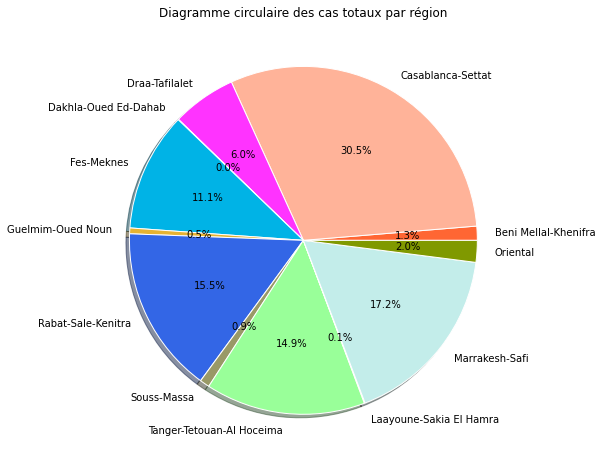

In [165]:
plt.figure(figsize=(16,8))
Slice = [my_data['Beni Mellal-Khenifra'][-1],my_data['Casablanca-Settat'][-1],my_data['Draa-Tafilalet'][-1],
        my_data['Dakhla-Oued Ed-Dahab'][-1],my_data['Fes-Meknes'][-1],my_data['Guelmim-Oued Noun'][-1],
        my_data['Rabat-Sale-Kenitra'][-1],my_data['Souss-Massa'][-1],my_data['Tanger-Tetouan-Al Hoceima'][-1],
        my_data['Laayoune-Sakia El Hamra'][-1],my_data['Marrakesh-Safi'][-1],my_data['Oriental'][-1]]
Labels = ['Beni Mellal-Khenifra','Casablanca-Settat','Draa-Tafilalet','Dakhla-Oued Ed-Dahab','Fes-Meknes',
         'Guelmim-Oued Noun','Rabat-Sale-Kenitra','Souss-Massa','Tanger-Tetouan-Al Hoceima','Laayoune-Sakia El Hamra',
         'Marrakesh-Safi','Oriental']
Colors = ['#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6', 
		  '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
		  '#c3edea', '#809900']
Explode = [0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(Slice,colors = Colors,explode = Explode,shadow = True,autopct='%1.1f%%',
        labels = Labels,wedgeprops = {'edgecolor':'white'})


plt.title('Diagramme circulaire des cas totaux par région')

Prévision


In [166]:
from fbprophet import Prophet

In [167]:
total_Deaths = my_data['Deaths']
total_Confirmed = my_data['Confirmed']
total_Recovered = my_data['Recovered']
mortaloty_rate = 100*total_Deaths/total_Confirmed

In [168]:
# Adding a new daily cases column to our data
new_cases = []
for i in range(len(total_Confirmed)):
    if i == 0:
        new_cases.append(0)
    elif total_Confirmed[i] < total_Confirmed[i-1]:
        new_cases.append(0)
    else:
        temp = int(total_Confirmed[i] - total_Confirmed[i-1])
        new_cases.append(temp)
    
new_cases = np.array(new_cases)
my_data['New cases'] = new_cases

In [169]:
df = pd.DataFrame(my_data['New cases'])
df.style.background_gradient(cmap='Oranges')

,New cases
Date,
2020-03-20 00:00:00,0
2020-03-21 00:00:00,10
2020-03-22 00:00:00,13
2020-03-23 00:00:00,34
2020-03-24 00:00:00,27
2020-03-25 00:00:00,55
2020-03-26 00:00:00,50
2020-03-27 00:00:00,70
2020-03-28 00:00:00,57


In [170]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.bar(my_data, x=my_data.index, y="New cases", color='New cases', orientation='v', height=600,
             title='Les cas confirmés', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=my_data.index, y = my_data['Confirmed'], mode= 'lines+markers',name='Total Cases', line=dict(color='#af8baf', width=2)))
fig.add_trace(go.Scatter(x=my_data.index, y = my_data['Recovered'], mode='lines+markers',name='Recovered',line=dict(color='#32e0c4', width=2)))
fig.add_trace(go.Scatter(x=my_data.index, y=my_data['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.update_layout(title_text='Les cas cumulés',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=my_data.index, y = my_data['Actif'], mode= 'lines+markers',name='Total Cases'))
fig.update_layout(title_text='Les cas actifs',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

1. Prévoir les cas dans les 14 jours prochains


In [171]:
confirmed = my_data.groupby('Date').sum()['Confirmed'].reset_index()

confirmed.columns = ['ds','y']

In [172]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=14)
future.tail(14)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
93,2020-06-21
94,2020-06-22
95,2020-06-23
96,2020-06-24
97,2020-06-25
98,2020-06-26
99,2020-06-27
100,2020-06-28
101,2020-06-29
102,2020-06-30


In [173]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
102,2020-06-30,10149.921823,9865.065045,10490.619564
103,2020-07-01,10220.825547,9903.352029,10572.352633
104,2020-07-02,10292.718366,9942.335731,10714.257035
105,2020-07-03,10428.924730,10014.264776,10878.327779
106,2020-07-04,10517.532310,10084.724771,11052.902117


In [174]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y = abs(forecast['yhat'].round()), mode= 'lines+markers',name='Prédiction des cas par jour'))
fig.add_trace(go.Scatter(x=my_data.index, y = my_data['Confirmed'], mode= 'lines+markers',name='Cas par jour'))

2. Prévision des nouveaux cas

In [175]:
new_cases = my_data.groupby('Date').sum()['New cases'].reset_index()
new_cases.columns = ['ds','y']

In [176]:
m_1 = Prophet(interval_width=0.95)
m_1.fit(new_cases)
future_1 = m_1.make_future_dataframe(periods=10)
future_1.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
98,2020-06-26
99,2020-06-27
100,2020-06-28
101,2020-06-29
102,2020-06-30


In [177]:
forecast_1 = m_1.predict(future_1)
forecast_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
98,2020-06-26,150.487158,16.291223,302.378504
99,2020-06-27,117.855782,-32.689067,249.994279
100,2020-06-28,120.490154,-19.875141,256.968877
101,2020-06-29,114.390415,-24.746207,258.681677
102,2020-06-30,106.518582,-30.609518,232.102633


In [178]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_1.ds, y = abs(forecast_1['yhat'].round()), mode= 'lines+markers',name='Predicted daily cases'))

fig.add_trace(go.Scatter(x=my_data.index, y = my_data['New cases'], mode= 'lines+markers',name='Daily cases'))

3. Prévision des décès

In [179]:
deaths = my_data.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['ds','y']

In [180]:
m_2 = Prophet(interval_width=0.95)
m_2.fit(deaths)
future_2 = m_2.make_future_dataframe(periods=14)
future_2.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
102,2020-06-30
103,2020-07-01
104,2020-07-02
105,2020-07-03
106,2020-07-04


In [181]:
forecast_2 = m_2.predict(future_2)
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
102,2020-06-30,219.597204,206.786014,233.281120
103,2020-07-01,219.355334,204.599904,235.296575
104,2020-07-02,219.777061,202.989705,237.111565
105,2020-07-03,221.271129,203.326473,240.031578
106,2020-07-04,221.229840,201.052306,242.329359


In [182]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_2.ds, y = abs(forecast_2['yhat'].round()), mode= 'lines+markers',name='Predicted total deaths'))

fig.add_trace(go.Scatter(x=my_data.index, y = my_data['Deaths'], mode= 'lines+markers',name='Daily cases'))